In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

In [ ]:

df = pd.read_csv('spam.csv', encoding='latin')

In [ ]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1625,ham,Hi Dear Call me its urgnt. I don't know whats ...,NaN,NaN,NaN
3975,ham,I wish u were here. I feel so alone,NaN,NaN,NaN
1119,spam,"Bored of speed dating? Try SPEEDCHAT, txt SPEE...",NaN,NaN,NaN
1588,ham,At 4. Let's go to bill millers,NaN,NaN,NaN
1668,ham,"Yes..but they said its IT.,",NaN,NaN,NaN
19,spam,England v Macedonia - dont miss the goals/team...,NaN,NaN,NaN
3722,ham,We left already we at orchard now.,NaN,NaN,NaN
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
3624,ham,I want to tel u one thing u should not mistake...,NaN,NaN,NaN
3640,spam,You can stop further club tones by replying \S...,"PO Box 1146 MK45 2WT (2/3)""",NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [ ]:
df.sample(10)

,target,text
2002,spam,TheMob>Yo yo yo-Here comes a new selection of ...
4279,spam,WINNER!! As a valued network customer you have...
2105,ham,I fetch yun or u fetch?
2730,ham,I havent lei.. Next mon can?
3925,ham,I havent add Ì_ yet right..
3378,ham,Dear umma she called me now :-)
2179,ham,And popping &lt;#&gt; ibuprofens was no help.
5177,ham,Very strange. and are watching the 2nd one n...
4865,ham,"Oh! Shit, I thought that was your trip! Looooo..."
933,ham,What time you think you'll have it? Need to kn...


In [ ]:
encoder = LabelEncoder()


In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

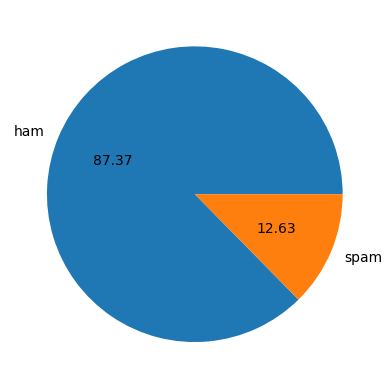

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_char']=df['text'].apply(len)

In [ ]:
df.head

<bound method NDFrame.head of       target                                               text  num_char
0          0  Go until jurong point, crazy.. Available only ...       111
1          0                      Ok lar... Joking wif u oni...        29
2          1  Free entry in 2 a wkly comp to win FA Cup fina...       155
3          0  U dun say so early hor... U c already then say...        49
4          0  Nah I don't think he goes to usf, he lives aro...        61
...      ...                                                ...       ...
5567       1  This is the 2nd time we have tried 2 contact u...       161
5568       0              Will Ì_ b going to esplanade fr home?        37
5569       0  Pity, * was in mood for that. So...any other s...        57
5570       0  The guy did some bitching but I acted like i'd...       125
5571       0                         Rofl. Its true to its name        26

[5169 rows x 3 columns]>

In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #word count
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  #sentence count

In [ ]:
df.head

<bound method NDFrame.head of       target                                               text  num_char  \
0          0  Go until jurong point, crazy.. Available only ...       111   
1          0                      Ok lar... Joking wif u oni...        29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3          0  U dun say so early hor... U c already then say...        49   
4          0  Nah I don't think he goes to usf, he lives aro...        61   
...      ...                                                ...       ...   
5567       1  This is the 2nd time we have tried 2 contact u...       161   
5568       0              Will Ì_ b going to esplanade fr home?        37   
5569       0  Pity, * was in mood for that. So...any other s...        57   
5570       0  The guy did some bitching but I acted like i'd...       125   
5571       0                         Rofl. Its true to its name        26   

      num_words  num_sent  
0            24  

In [ ]:
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

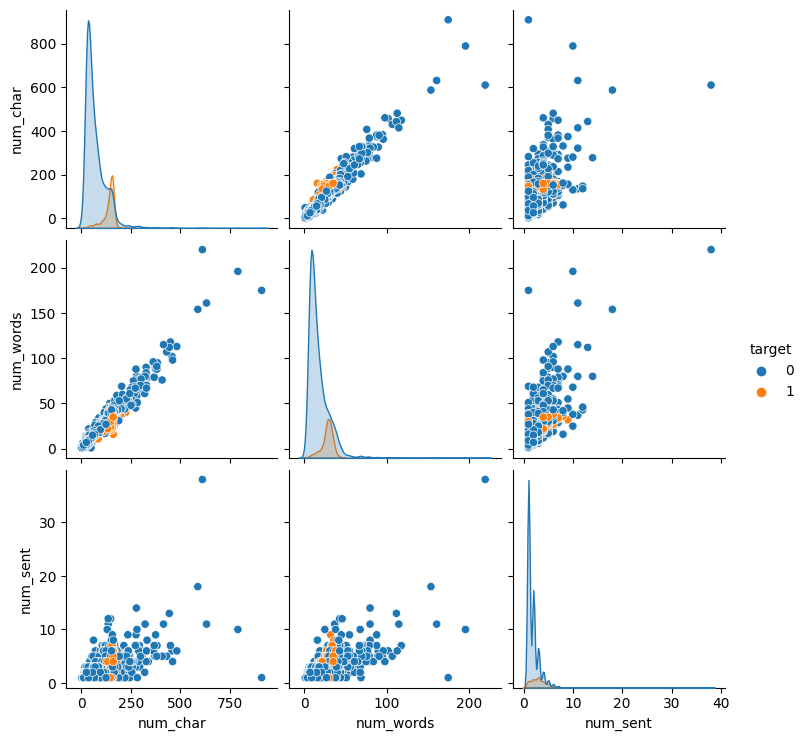

In [ ]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df, hue="target")
plt.show(fg)

In [ ]:
df = df[(df["num_char"]<350)]
df.shape

(5149, 5)

<Figure size 1200x800 with 0 Axes>

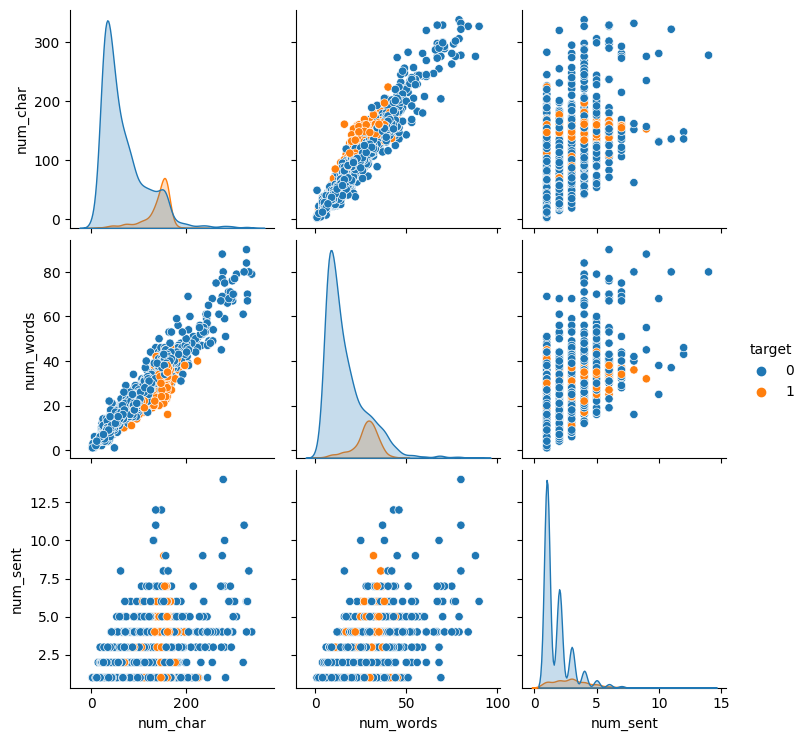

In [ ]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df, hue="target")
plt.show(fg)

In [ ]:
import re

In [ ]:
# Defining a function to clean up the text
def clean(text):
    sms = re.sub('[^a-zA-Z]', ' ', text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

df["clean_text"] = df["text"].apply(clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*df["clean_text"][:5], sep = "\n")

 The First 5 Texts after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


<ipython-input-34-59182a0a88b3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["text"].apply(clean)


In [ ]:
df["Tokenize_Text"]=df.apply(lambda row: nltk.word_tokenize(row["clean_text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*df["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


<ipython-input-35-a329439c780d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tokenize_Text"]=df.apply(lambda row: nltk.word_tokenize(row["clean_text"]), axis=1)


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df["Nostopword_Text"] = df["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*df["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


<ipython-input-37-22fb1b4c74ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nostopword_Text"] = df["Tokenize_Text"].apply(remove_stopwords)


In [ ]:
nltk.download('wordnet')

lemmatizer = nltk.WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

df["Lemmatized_Text"] = df["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*df["Lemmatized_Text"][:5], sep = "\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...


 The First 5 Texts after lemitization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


<ipython-input-38-13adfdf6526d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Lemmatized_Text"] = df["Nostopword_Text"].apply(lemmatize_word)


In [ ]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in df["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature
X.dtype

dtype('float64')

In [ ]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
df["target"] = label_encoder.fit_transform(df["target"])

<ipython-input-42-f05f3bd608db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = label_encoder.fit_transform(df["target"])


In [ ]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = df["target"]
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
#Testing on the following classifiers
classifiers = [MultinomialNB(),
               RandomForestClassifier(),
               KNeighborsClassifier(),
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [ ]:
# Cossvalidation
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.962856 
RandomForest: 0.973053 
KNeighbours: 0.913083 
SVC: 0.972810 


In [ ]:
from sklearn import metrics

In [ ]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)

    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
# initialise data of lists.
df = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(df, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [ ]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.745614,0.854271,0.975728,0.997815
RandomForest,1.000000,0.815789,0.898551,0.975728,0.997815
KNeighbours,1.000000,0.280702,0.438356,0.975728,0.997815
SVC,0.978495,0.798246,0.879227,0.975728,0.997815


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
mnb = MultinomialNB()
X = tfidf.fit_transform(corpus).toarray()

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and correspondiong labels (replace with your actual data)
x_train = ["sample text 1", "sample text 2", "sample text 3"]
y_train= [0, 1, 0]   # 0 is negative and 1 is positive

#create and train the TF_IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
x_train_tfidf = tfidf.fit_transform(x_train)


#create and train the naive bayes classifier
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)

#save the trained TF-IDF vectorizer and naive bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
  pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
  pickle.dump(mnb, model_file)